In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Find Missing Values -- Check DataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Check Duplicate Rowa
df.duplicated().sum()

0

In [6]:
#Check How many Customer Bank Leave 
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
#Check Geography
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
#Check How Many Male - Female
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#Coverting Non-numerical data to Numerical
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
#Scaled Data

X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [14]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(3, activation='sigmoid', input_dim=11)) #11 inputs--> 3 input_layer--> 1 hidean--> 1 output
model.add(Dense(1, activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [19]:
model.fit(X_train_trf,y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5751
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4912
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4609
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4486
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4416
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4368
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4333
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4307
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4287
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4272


In [20]:
model.layers[0].get_weights()

[array([[ 0.13809542, -0.09428759,  0.44112843],
        [ 1.6046894 , -1.602891  , -1.0459307 ],
        [-0.28704226,  0.04551914,  0.02878722],
        [ 0.45190912,  0.20580816, -0.37238735],
        [ 0.1290583 ,  0.74633145,  0.02183983],
        [-0.06025248, -0.0851253 ,  0.12070414],
        [-0.3613945 ,  0.3482311 ,  1.0798548 ],
        [-0.15958357, -0.16880684, -0.02484304],
        [ 0.03302203, -0.7410368 , -0.85628146],
        [ 0.00235111, -0.15975283, -0.0736585 ],
        [-0.6022143 ,  0.49303955,  0.3352061 ]], dtype=float32),
 array([-0.2787933,  0.6219414,  0.5968114], dtype=float32)]

In [21]:
model.layers[1].get_weights()

[array([[ 0.7221598],
        [-1.1694592],
        [-1.3223481]], dtype=float32),
 array([-0.40552697], dtype=float32)]

In [22]:
model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


array([[0.2528301 ],
       [0.35362506],
       [0.18074664],
       ...,
       [0.16266468],
       [0.13178529],
       [0.2274473 ]], dtype=float32)

In [23]:
y_log  = model.predict(X_test_trf)

y_pred = np.where(y_log > 0.5, 1 , 0)

63/63 [==============================] - 0s 2ms/step


In [24]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.813

#Changes In Model

In [26]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11)) #11 inputs--> 11 input_layer--> 1 hidean--> 1 output
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', optimizer='Adam' , metrics=['accuracy']) #compile time check accuracy of model

In [29]:
history = model.fit(X_train_trf,y_train, epochs=100, validation_split=0.2) #20% of trained data are split into test and with check accuracy score

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5229 - accuracy: 0.7853 - val_loss: 0.4728 - val_accuracy: 0.8037
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4489 - accuracy: 0.8105 - val_loss: 0.4485 - val_accuracy: 0.8094
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4311 - accuracy: 0.8130 - val_loss: 0.4380 - val_accuracy: 0.8156
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8180 - val_loss: 0.4313 - val_accuracy: 0.8131
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4137 - accuracy: 0.8238 - val_loss: 0.4246 - val_accuracy: 0.8156
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8313 - val_loss: 0.4184 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8348 - val_loss: 0.4071 - val_accuracy: 0.8225

In [30]:
model.layers[0].get_weights()

[array([[ 0.03527329, -0.33000734, -0.19097804, -0.0269642 ,  0.0161176 ,
         -0.00551124,  0.05486184, -0.12733282,  0.26908788,  0.10718586,
         -0.0020296 ],
        [-0.08680278, -0.51524097,  0.865949  , -0.31027308, -0.00346517,
          0.29291853,  1.0334781 ,  0.49508643, -0.34151825,  0.4125151 ,
         -0.49399027],
        [ 0.00793154,  0.02567463, -0.06216574, -0.40327236, -0.15878041,
         -0.24158306, -0.15013589, -0.28958815, -0.09535766,  0.11173474,
         -0.09420912],
        [-0.6729182 ,  0.9493823 , -0.15212771, -1.0651482 ,  0.14982863,
          0.649077  , -0.3195913 ,  0.13888717, -0.34878618, -0.26591605,
         -0.02345866],
        [ 0.8901644 ,  0.06130157, -0.5395904 ,  0.05439175,  0.9082871 ,
          0.72195375,  0.32656303, -0.39377245, -0.5714064 ,  0.27365258,
          0.19128913],
        [ 0.20729314,  0.08524439, -0.06615611, -0.24744181,  0.25671467,
          0.13021141, -0.01777203,  0.37269783,  0.43405923,  0.1577129

In [31]:
model.layers[1].get_weights()

[array([[-0.91096354,  0.10793548, -0.92467517,  0.29770413,  0.38039383,
          0.3672559 , -0.45648322,  0.72354513, -0.10412102, -1.0497309 ,
          0.03134105],
        [ 0.48904464,  0.14531784, -0.47304106, -0.8544079 , -0.11912471,
          0.36203197,  0.39193934, -0.47413516, -0.37988004, -0.13423762,
          0.07919092],
        [ 0.36157653,  0.19843356,  0.61792165,  0.24290061,  0.1062493 ,
         -0.10936854, -0.18746647,  0.43990302, -0.5598421 ,  0.66445   ,
         -0.26575878],
        [ 0.48806325,  0.3931286 ,  0.34371346, -0.43266782, -0.8828644 ,
          0.4715203 , -0.13180354, -0.3849683 ,  0.25694975, -0.11287753,
          0.01112317],
        [-0.35822183,  0.09044361,  0.19636348,  0.46272334, -0.8161962 ,
         -0.44711572, -0.12573071,  0.36644065,  0.38939074, -1.1004189 ,
          0.1030537 ],
        [ 0.09392405, -0.4607883 ,  0.34611234, -0.21783507, -0.33560222,
         -0.36357692, -0.12105604,  1.007254  , -0.19432485, -0.7131978

In [32]:
model.layers[2].get_weights()

[array([[ 0.8477572 ],
        [-0.65102905],
        [ 0.9700731 ],
        [ 0.8253166 ],
        [-1.1061707 ],
        [-0.69358444],
        [-0.6284147 ],
        [ 1.6076257 ],
        [-0.96000445],
        [ 1.0888644 ],
        [-0.48453364]], dtype=float32),
 array([-0.15856959], dtype=float32)]

In [33]:
model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


array([[0.22835371],
       [0.22298719],
       [0.18244828],
       ...,
       [0.26416364],
       [0.16849822],
       [0.20250551]], dtype=float32)

In [34]:
y_log  = model.predict(X_test_trf)

y_pred = np.where(y_log > 0.5, 1 , 0)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [35]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

In [36]:
import matplotlib.pyplot as plt

In [37]:
history.history

{'loss': [0.5228990316390991,
  0.44887039065361023,
  0.43107348680496216,
  0.4209999740123749,
  0.41365471482276917,
  0.40551435947418213,
  0.3969530761241913,
  0.3861449956893921,
  0.37475356459617615,
  0.36461853981018066,
  0.35598260164260864,
  0.351045697927475,
  0.34668979048728943,
  0.34386253356933594,
  0.3417321741580963,
  0.34036123752593994,
  0.3381994962692261,
  0.3376206159591675,
  0.3359273076057434,
  0.33551105856895447,
  0.3345184624195099,
  0.33406656980514526,
  0.3327513039112091,
  0.33244606852531433,
  0.3312809467315674,
  0.331076443195343,
  0.3301350474357605,
  0.3301433324813843,
  0.329757958650589,
  0.3287769556045532,
  0.32859334349632263,
  0.32776957750320435,
  0.32713034749031067,
  0.32734188437461853,
  0.32662954926490784,
  0.3265661299228668,
  0.3261626064777374,
  0.32575884461402893,
  0.3259330987930298,
  0.32535645365715027,
  0.32572364807128906,
  0.32465648651123047,
  0.3248731195926666,
  0.32510167360305786,
  0.

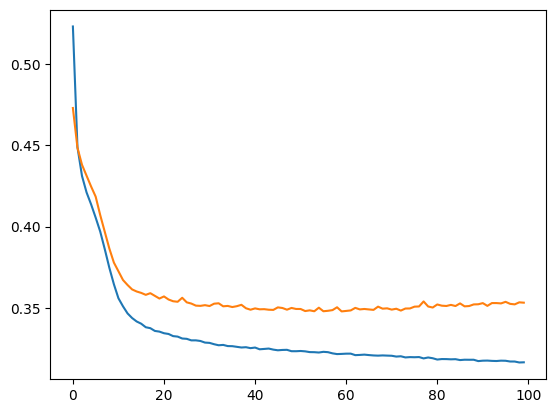

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

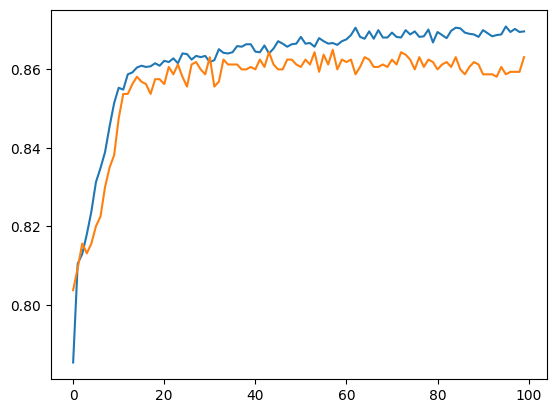

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [40]:
import seaborn as sns

<Axes: ylabel='Density'>

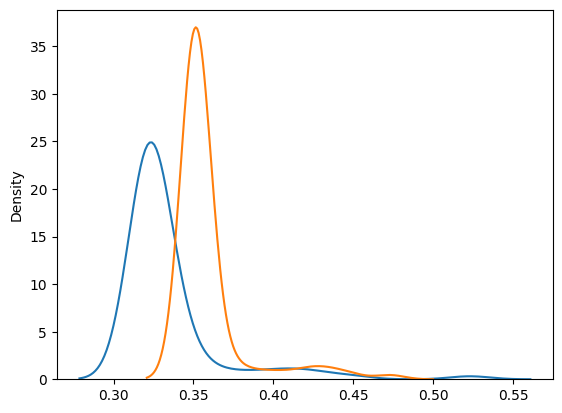

In [41]:
sns.kdeplot(history.history['loss'])
sns.kdeplot(history.history['val_loss'])